In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from progressbar import ProgressBar
import plotly.express as px

In [3]:
def sort_by_class(word, word_class):
  d = dict()
  for i in range(len(word)):
    s = d.get(word_class[i], set())
    s.add(word[i])
    d[word_class[i]] = s
  return d

In [30]:
# Reference: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

pbar = ProgressBar()

def get_embeddings(pretrained_path):
  embeddings_dict = {}
  with open(pretrained_path, 'r', encoding="utf-8") as f:
    for line in pbar(f):
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector
  print("Finish getting the embeddings!")
  return embeddings_dict

def glove_visualize(embeddings_dict, words_dict, words_type, dataset_type, figsize, dpi):
  N = 0
  words = []
  words_class = []
  vectors = []
  for word_class in words_dict:
    word_list = list(words_dict[word_class])
    N += len(word_list)
    for i in range(len(word_list)):
      if word_list[i] in embeddings_dict:
        words.append(word_list[i])
        words_class.append(word_class)
        vectors.append(embeddings_dict[word_list[i]])
  print("We visualize {:.2f}% of the {} in the {} set:".format(len(words) / N * 100, words_type, dataset_type))

  tsne2 = TSNE(n_components=2, random_state=0)
  Y2 = tsne2.fit_transform(vectors[:1000])
  tsne3 = TSNE(n_components=3, random_state=0)
  Y3 = tsne3.fit_transform(vectors[:1000])

  fig = plt.figure(figsize=figsize, dpi=dpi)
  fig.suptitle("Textual Feature Embeddings of "+words_type+" in "+dataset_type+" set ", fontsize=20)
  ax = fig.add_subplot(1, 2, 1)
  ax.scatter(Y2[:, 0], Y2[:, 1], s=50)
  for label, x, y in zip(words_class, Y2[:, 0], Y2[:, 1]):
      ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", size=8)  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter3D(Y3[:, 0], Y3[:, 1], Y3[:, 2], s=50)
  
  plt.savefig(words_type+"_embeddings_"+dataset_type)
  plt.show()

In [23]:
path = "/content/drive/MyDrive/dataset/epic-kitchens-100-annotations-master/"
train_path = path + "EPIC_100_train.csv"
val_path = path + "EPIC_100_validation.csv"

train = pd.read_csv(train_path, sep=',')
val = pd.read_csv(val_path, sep=',')

train_action = sort_by_class(train['verb'], train['verb_class'])
val_action = sort_by_class(val['verb'], val['verb_class'])
train_object = sort_by_class(train['noun'], train['noun_class'])
val_object = sort_by_class(val['noun'], val['noun_class'])

In [24]:
pretrained_path = "/content/drive/MyDrive/dataset/util/glove/glove.42B.300d.txt"
embeddings_dict = get_embeddings(pretrained_path)

| |#                                            | 1917494 Elapsed Time: 0:03:09


Finish getting the embeddings!


We visualize 56.89% of the Actions in the Training set:


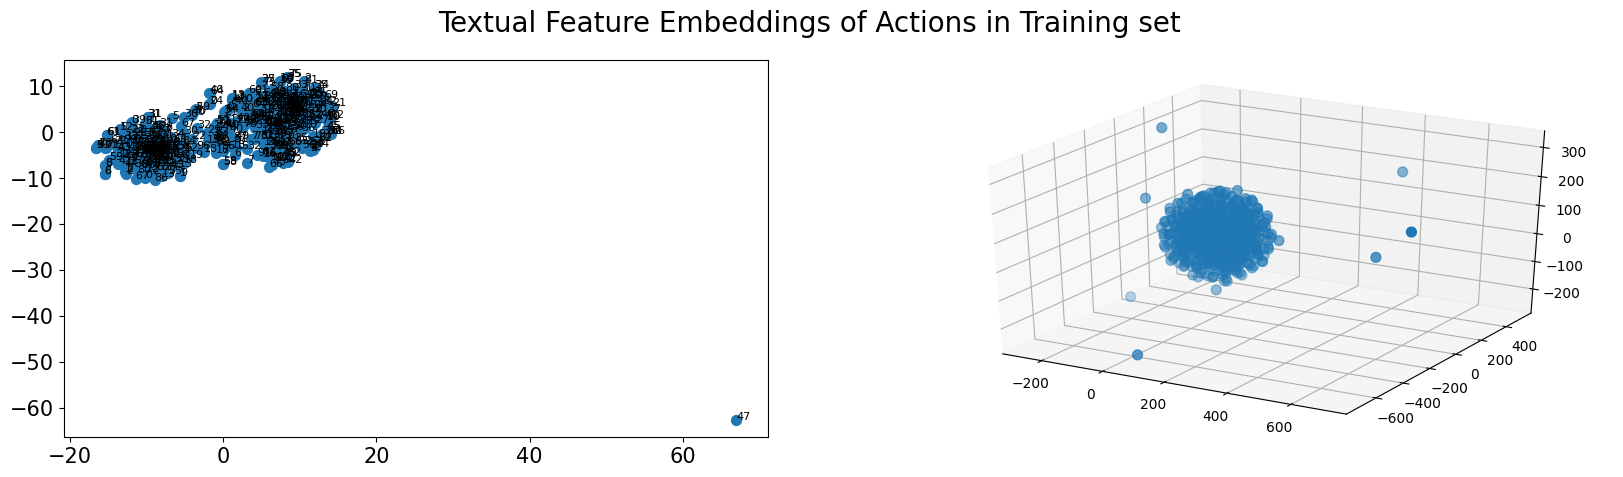

We visualize 68.17% of the Actions in the Validation set:


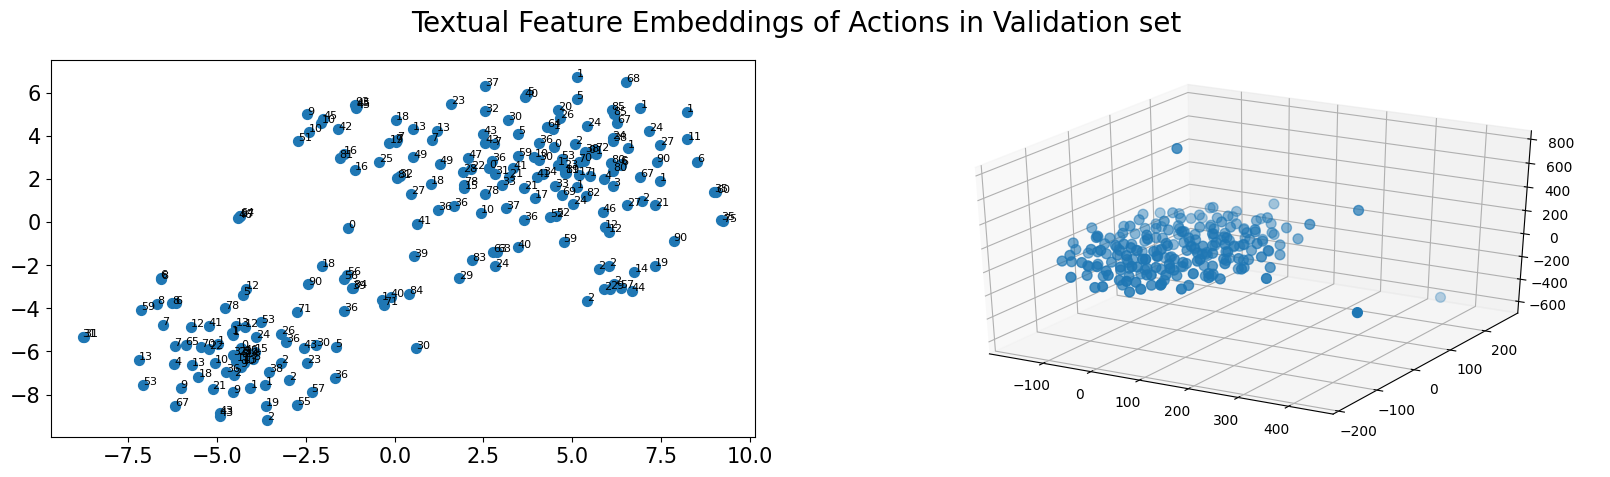

We visualize 29.23% of the Objects in the Training set:


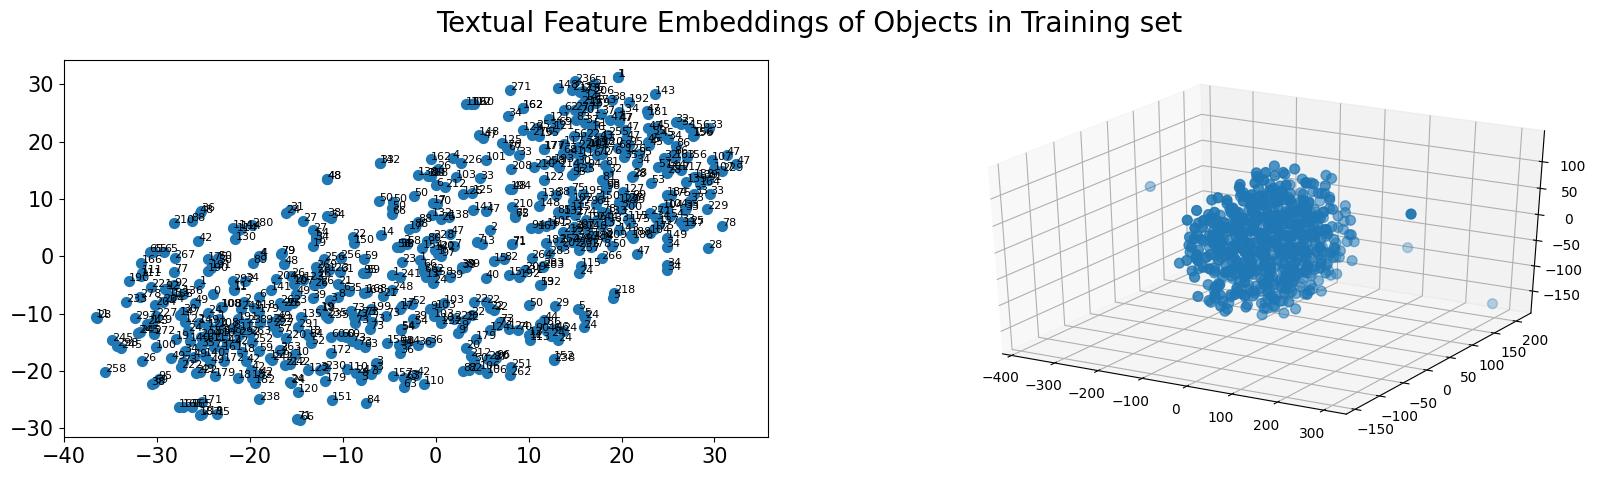

We visualize 46.26% of the Objects in the Validation set:


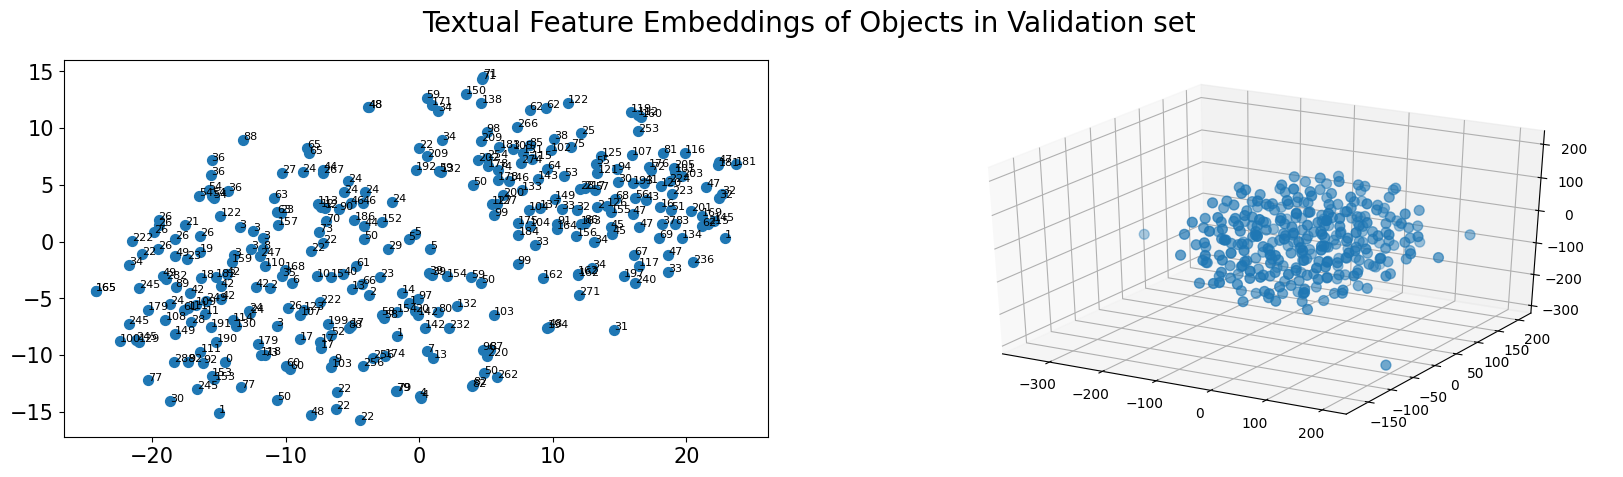

In [31]:
glove_visualize(embeddings_dict, train_action, "Actions", "Training", (20,5), 100)
glove_visualize(embeddings_dict, val_action, "Actions", "Validation", (20,5), 100)
glove_visualize(embeddings_dict, train_object, "Objects", "Training", (20,5), 100)
glove_visualize(embeddings_dict, val_object, "Objects", "Validation", (20,5), 100)

In [35]:
pretrained_path = "/content/drive/MyDrive/dataset/util/glove/glove.6B.300d.txt"
embeddings_dict = get_embeddings(pretrained_path)

| |                                #            | 1593513 Elapsed Time: 0:32:56

Finish getting the embeddings!


We visualize 41.12% of the Actions in the Training set:


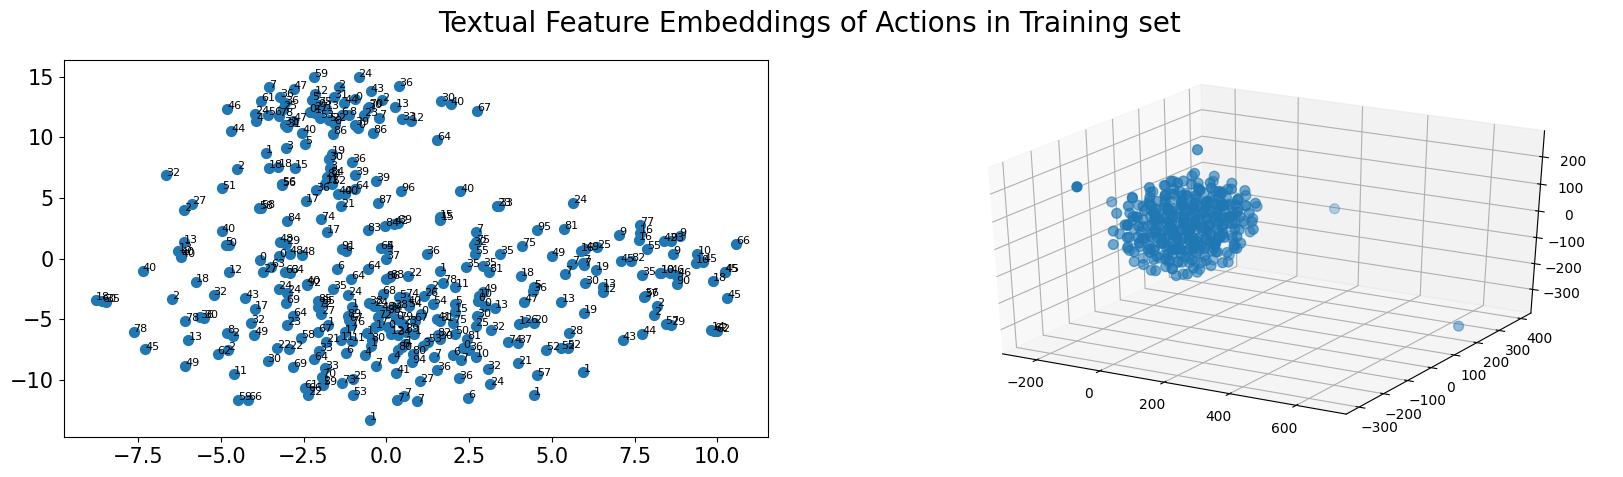

We visualize 53.75% of the Actions in the Validation set:


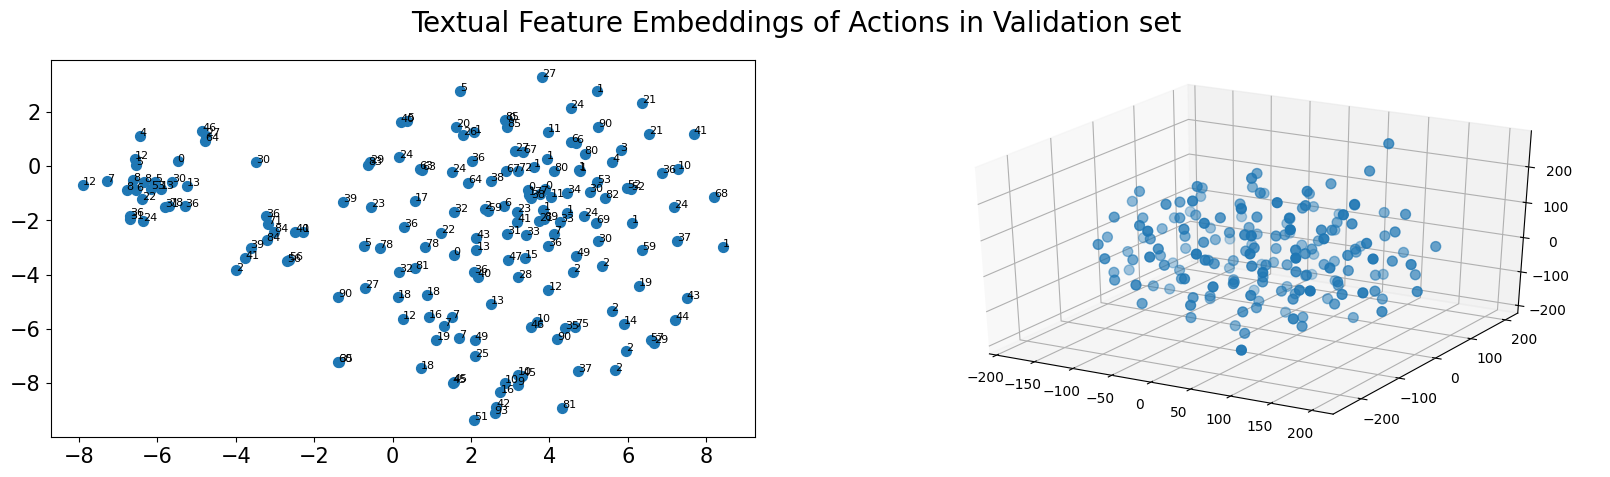

We visualize 28.49% of the Objects in the Training set:


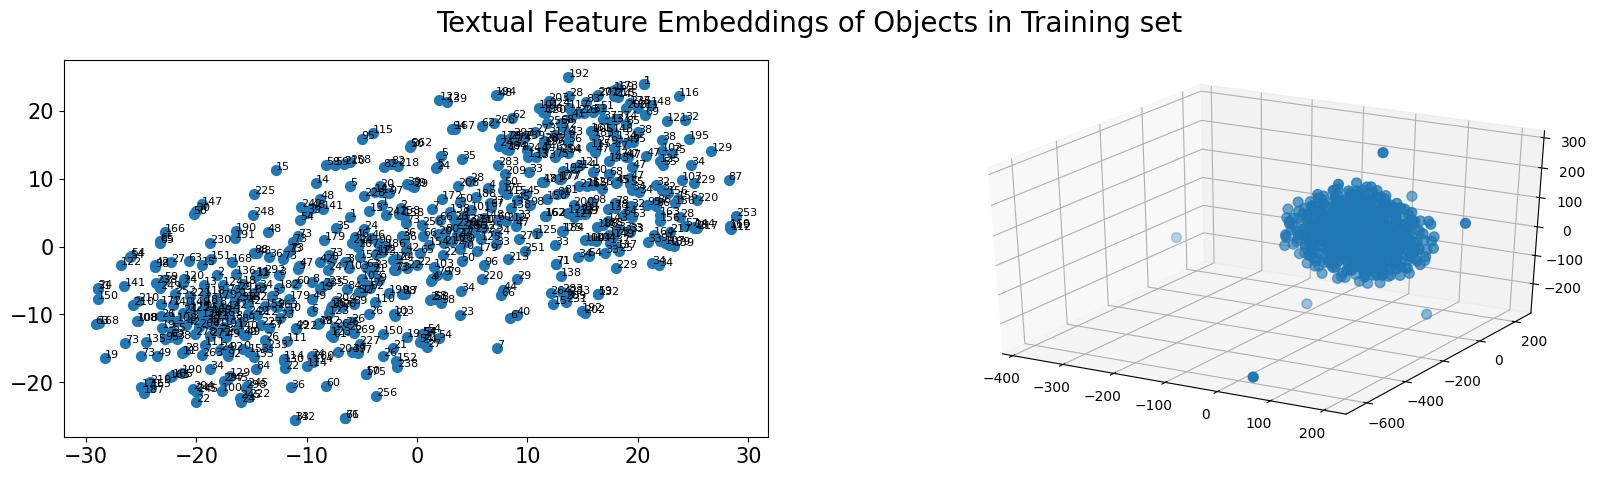

We visualize 45.36% of the Objects in the Validation set:


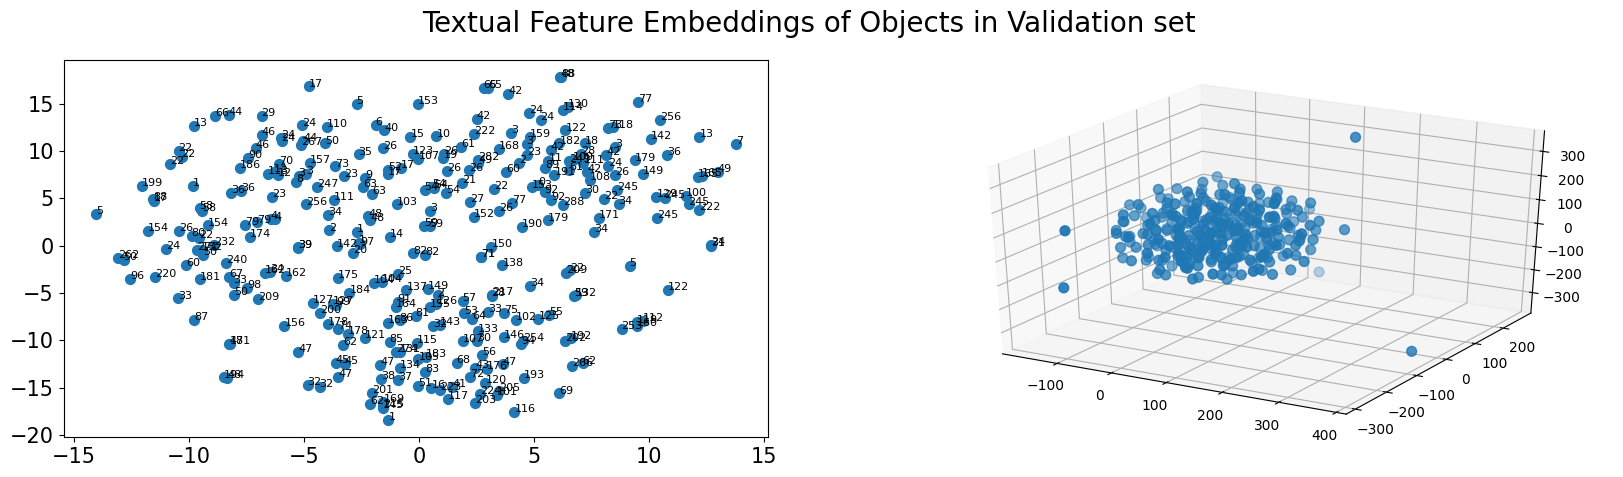

In [36]:
glove_visualize(embeddings_dict, train_action, "Actions", "Training", (20,5), 100)
glove_visualize(embeddings_dict, val_action, "Actions", "Validation", (20,5), 100)
glove_visualize(embeddings_dict, train_object, "Objects", "Training", (20,5), 100)
glove_visualize(embeddings_dict, val_object, "Objects", "Validation", (20,5), 100)

In [32]:
pretrained_path = "/content/drive/MyDrive/dataset/util/glove/glove.twitter.27B.200d.txt"
embeddings_dict = get_embeddings(pretrained_path)

| |            #                                | 1193513 Elapsed Time: 0:01:37


Finish getting the embeddings!


We visualize 40.07% of the Actions in the Training set:


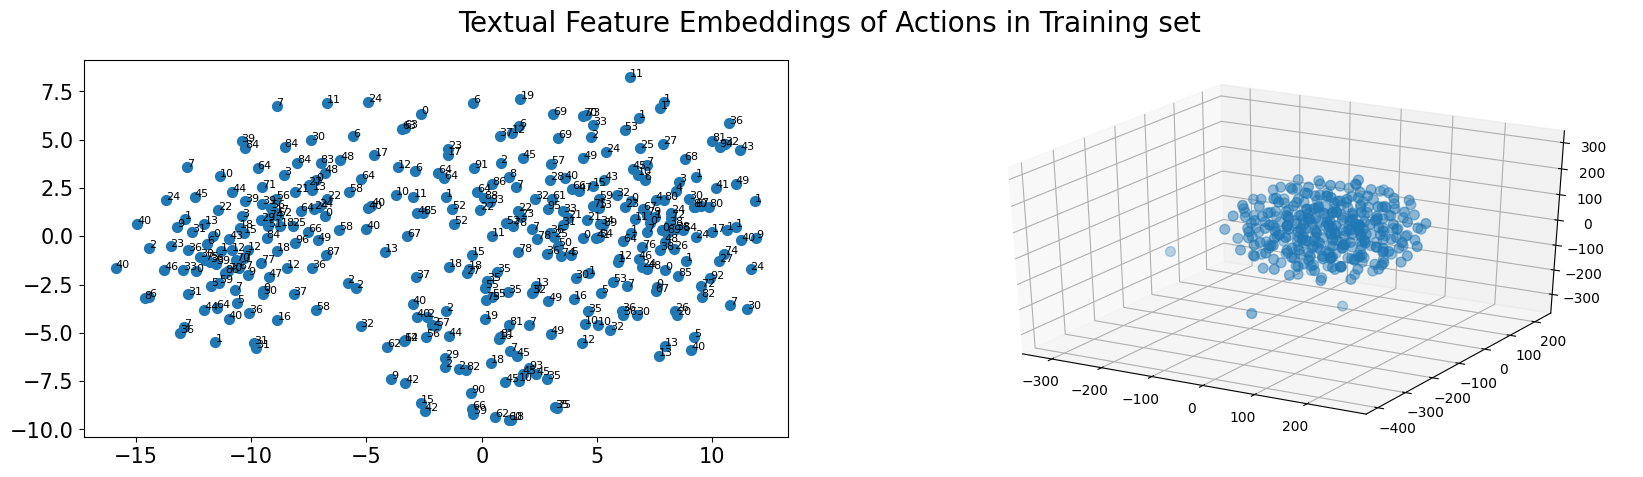

We visualize 52.55% of the Actions in the Validation set:


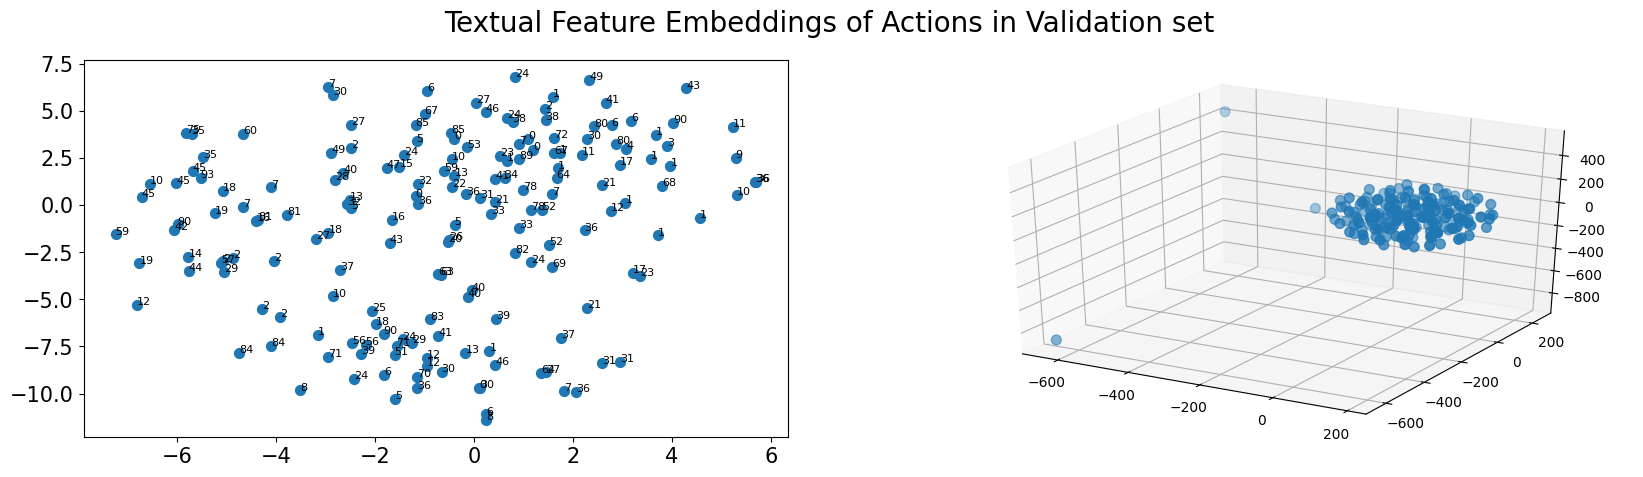

We visualize 28.69% of the Objects in the Training set:


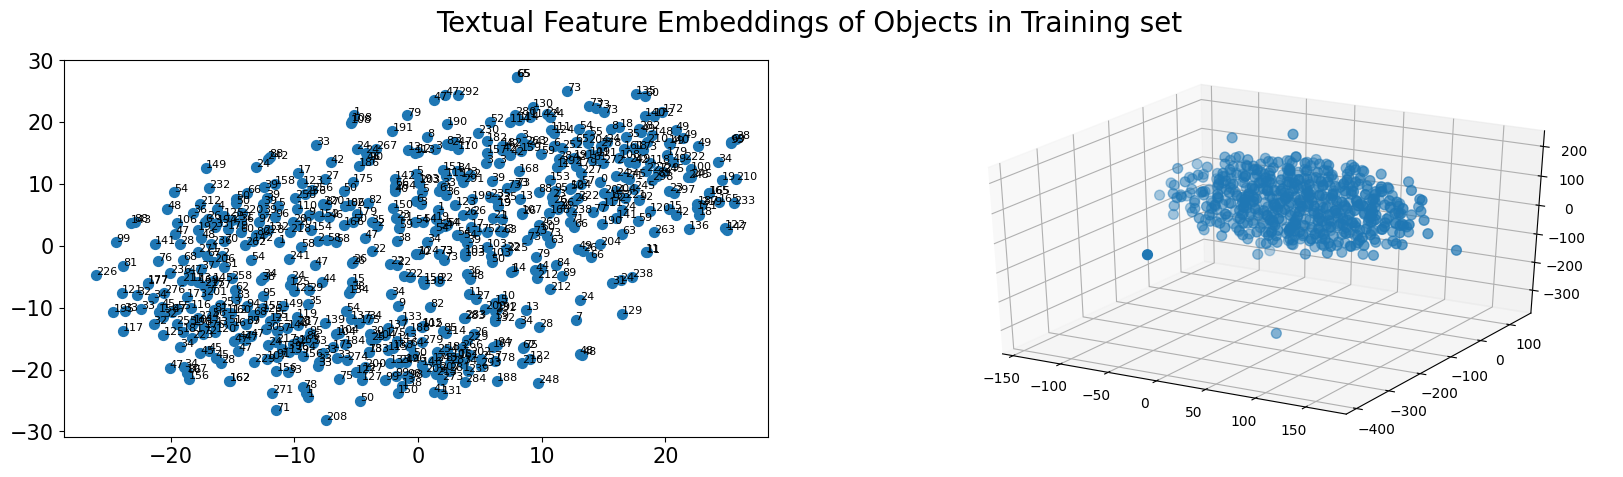

We visualize 45.66% of the Objects in the Validation set:


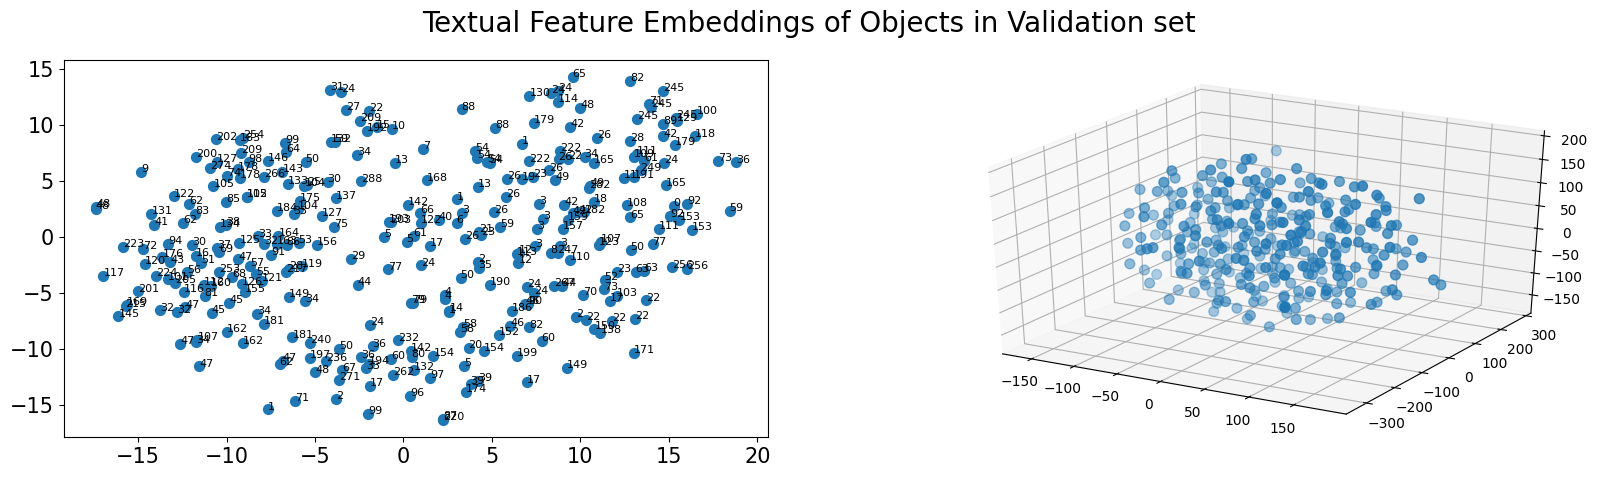

In [33]:
glove_visualize(embeddings_dict, train_action, "Actions", "Training", (20,5), 100)
glove_visualize(embeddings_dict, val_action, "Actions", "Validation", (20,5), 100)
glove_visualize(embeddings_dict, train_object, "Objects", "Training", (20,5), 100)
glove_visualize(embeddings_dict, val_object, "Objects", "Validation", (20,5), 100)